# Advanced Homework 1

<br>**All exercises will work on the Australia Fire dataset:**<br>
https://www.kaggle.com/carlosparadis/fires-from-space-australia-and-new-zeland <br><br>
**We will work with fire_nrt_V1_96617.csv which is described here:**<br>
https://earthdata.nasa.gov/earth-observation-data/near-real-time/firms/viirs-i-band-active-firedata

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Task 1: Density Plots

### 1.1) Plot the longitude vs latitude several ways within a single figure (each in its own axes)

In [2]:
# Reading the CSV 
df_data = pd.read_csv("Data/fire_nrt_V1_96617.csv")
df_data.head()

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight
0,-42.69706,147.70634,333.6,0.57,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,293.4,4.0,D
1,-42.26889,147.31104,336.2,0.39,0.44,2019-10-01,336,N,VIIRS,n,1.0NRT,296.9,3.9,D
2,-40.85202,145.38068,327.9,0.46,0.47,2019-10-01,336,N,VIIRS,n,1.0NRT,295.3,3.7,D
3,-42.39329,147.47144,346.9,0.38,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,294.2,6.2,D
4,-42.69701,147.70584,334.1,0.56,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,293.5,4.1,D


In [3]:
df_data.shape

(956257, 14)

### 1. Using the matplotlib defaults.

In [4]:
lati_data = df_data["latitude"]
long_data = df_data["longitude"]

Text(0, 0.5, 'Latitude')

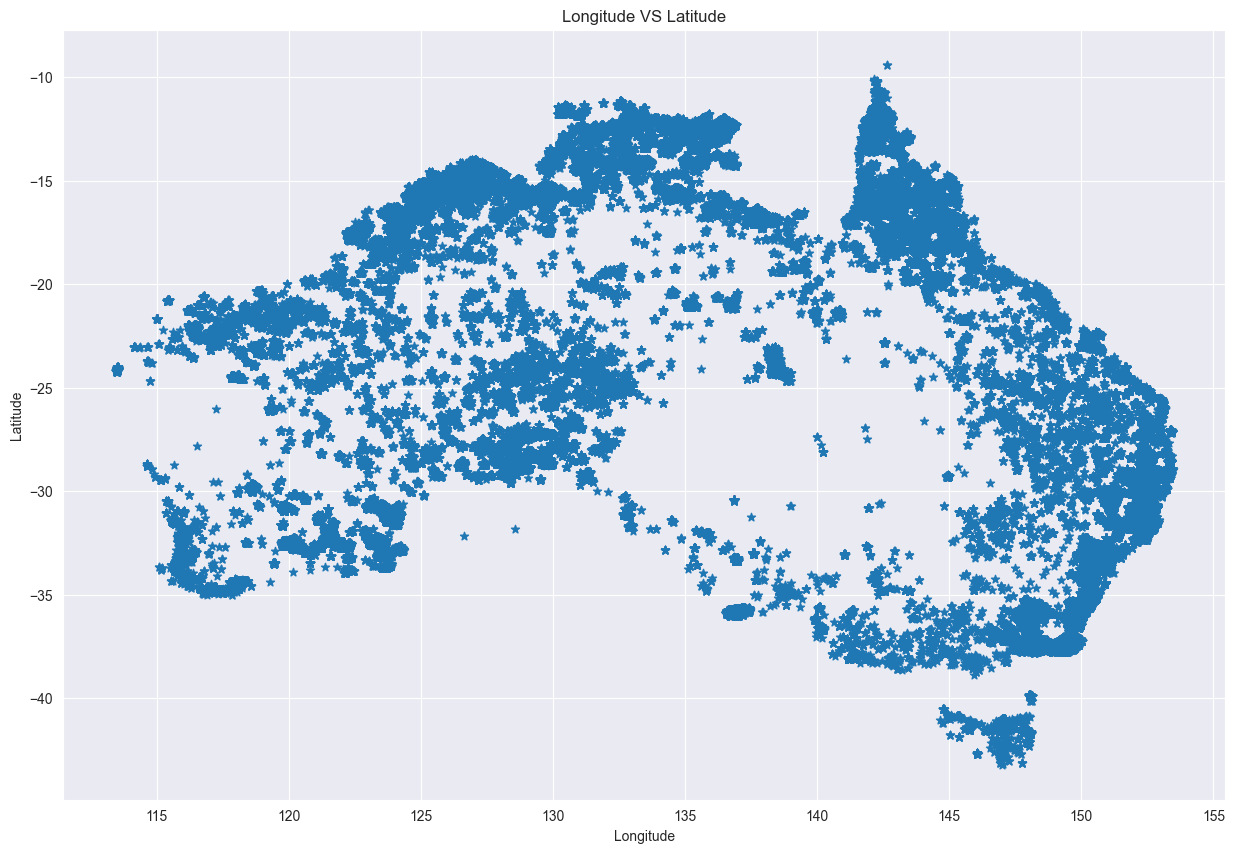

In [63]:
plt.figure(figsize=(15,10))
plt.scatter(x=long_data,y=lati_data, marker="*")
plt.title("Longitude VS Latitude")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

### 2. Adjusting alpha and marker size to compensate for overplotting.

Text(0, 0.5, 'Latitude')

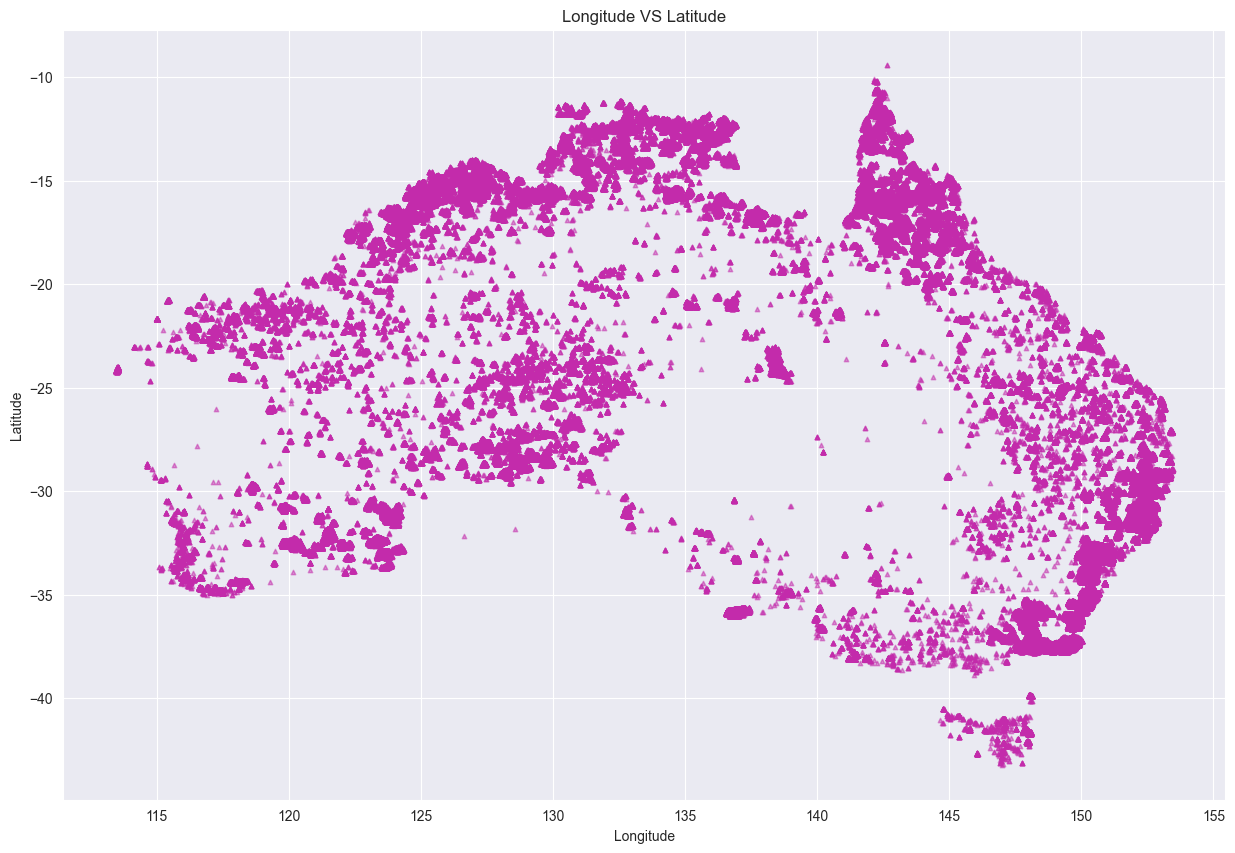

In [66]:
plt.figure(figsize=(15,10))
plt.scatter(x=long_data,y=lati_data,marker='^',s=10,alpha=0.5, c= "#c32bab")
plt.title("Longitude VS Latitude")
plt.xlabel("Longitude")
plt.ylabel("Latitude")


### 3. Using a hexbin plot.

In [7]:
xmin = min(long_data)
xmax = max(long_data)
ymin = min(lati_data)
ymax = max(lati_data)

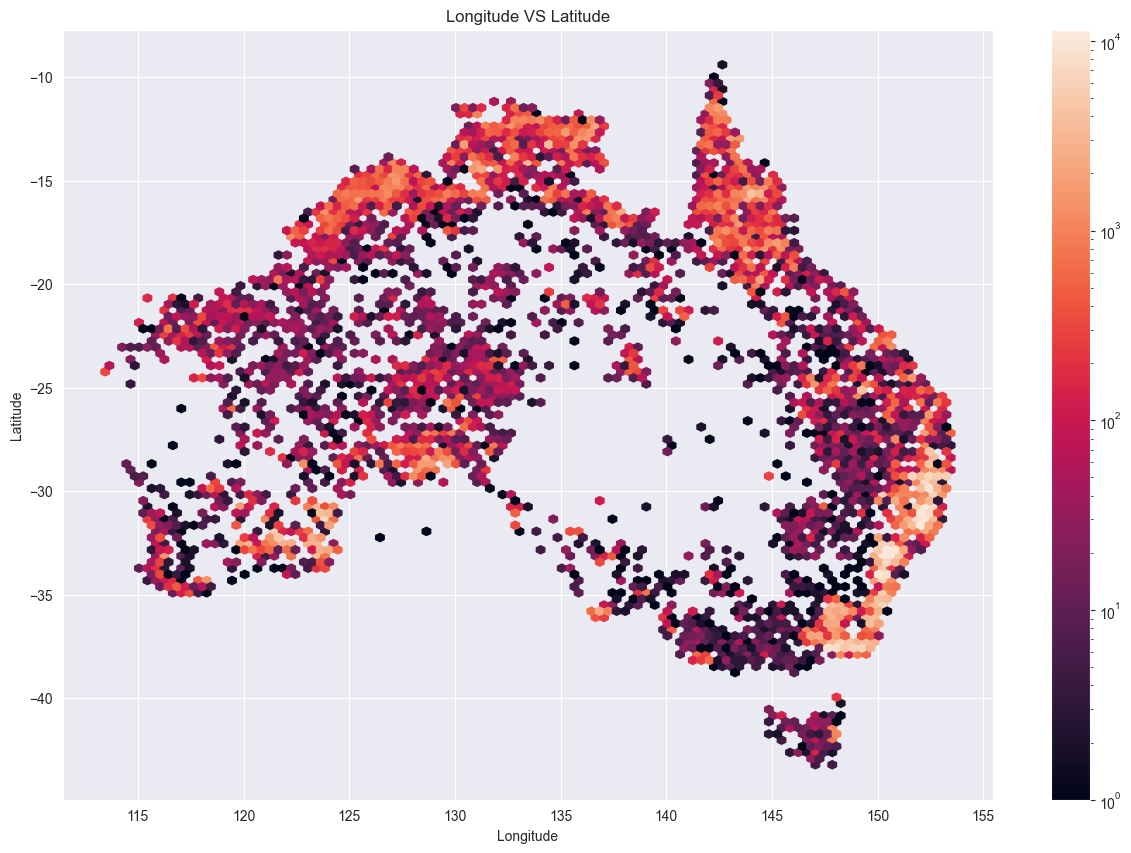

In [67]:
plt.figure(figsize=(15,10))
plt.hexbin(x=long_data,y=lati_data,bins="log",extent=(xmin,xmax,ymin,ymax))
plt.title("Longitude VS Latitude")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar()

### 4. Subsampling the dataset.

In [68]:
# SAMPLING
sample = df_data.sample(frac=0.01,random_state=6120)

samp_long = sample.longitude
samp_lati = sample.latitude

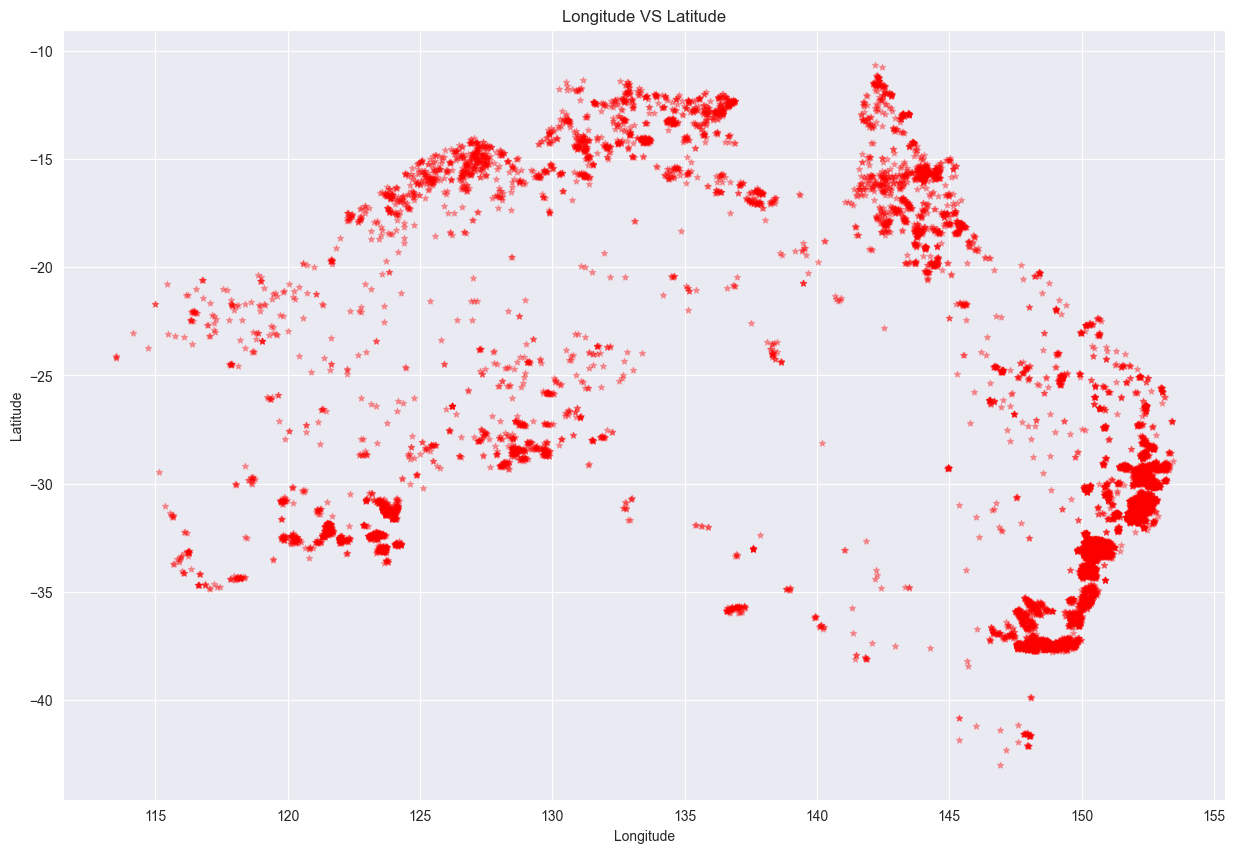

In [69]:
plt.figure(figsize=(15,10))
plt.title("Longitude VS Latitude")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.scatter(x=samp_long,y=samp_lati,marker='*',s=20,alpha=0.3, c= "#ff0000")

### 1.2) In what areas are most of the anomalies (measurements) located?
- **As we can clearly see from all the above Graphs, majority of measurements are concentrated in south-East Part of the Graph**

# Visualizing Class Membership

- Visualize the distribution of Brightness temperature I-4 as a histogram (with appropriate settings). 
- Let’s assume we are certain of a fire if the value of temperature I-4 is saturated as visible from the histogram.

<Axes: xlabel='bright_ti4', ylabel='Count'>

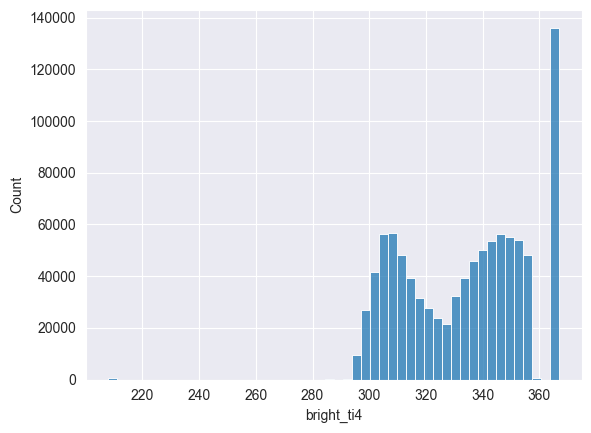

In [72]:
sns.histplot(df_data["bright_ti4"],bins=50)

**2.1) Do a small multiples plot of whether the brightness is saturated, i.e. do one plot of lat vs
long for those points with brightness saturated and a separate for those who are not (within the
same figure on separate axes).**

In [12]:
max(df_data["bright_ti4"])

367.0

In [13]:
low_sat =  df_data.query("bright_ti4 < 367")
low_sat 

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight
0,-42.69706,147.70634,333.6,0.57,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,293.4,4.0,D
1,-42.26889,147.31104,336.2,0.39,0.44,2019-10-01,336,N,VIIRS,n,1.0NRT,296.9,3.9,D
2,-40.85202,145.38068,327.9,0.46,0.47,2019-10-01,336,N,VIIRS,n,1.0NRT,295.3,3.7,D
3,-42.39329,147.47144,346.9,0.38,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,294.2,6.2,D
4,-42.69701,147.70584,334.1,0.56,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,293.5,4.1,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956252,-32.66628,122.15253,306.9,0.39,0.44,2020-01-11,1630,N,VIIRS,n,1.0NRT,288.6,0.8,N
956253,-32.58616,123.39582,299.0,0.51,0.41,2020-01-11,1630,N,VIIRS,n,1.0NRT,287.4,0.7,N
956254,-33.37853,115.94735,309.7,0.40,0.60,2020-01-11,1630,N,VIIRS,n,1.0NRT,291.7,1.0,N
956255,-33.21827,115.75078,300.2,0.49,0.65,2020-01-11,1806,N,VIIRS,n,1.0NRT,290.2,1.1,N


In [79]:
long_low = low_sat["longitude"]
lati_low = low_sat["latitude"]

In [14]:
high_sat = df_data.query("bright_ti4 >= 367 ")
high_sat

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight
43,-22.41233,150.68094,367.0,0.42,0.38,2019-10-01,342,N,VIIRS,h,1.0NRT,298.9,6.9,D
52,-19.94326,147.91037,367.0,0.38,0.36,2019-10-01,342,N,VIIRS,h,1.0NRT,310.0,7.0,D
60,-26.20142,146.65320,367.0,0.43,0.38,2019-10-01,342,N,VIIRS,h,1.0NRT,316.7,12.2,D
87,-22.50325,150.71536,367.0,0.42,0.38,2019-10-01,342,N,VIIRS,h,1.0NRT,302.0,16.4,D
102,-18.32221,142.46642,367.0,0.55,0.43,2019-10-01,342,N,VIIRS,h,1.0NRT,322.5,13.2,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
954996,-35.62225,148.51337,367.0,0.47,0.40,2020-01-11,1448,N,VIIRS,h,1.0NRT,284.8,9.5,N
955816,-36.35929,147.72372,367.0,0.49,0.40,2020-01-11,1448,N,VIIRS,h,1.0NRT,296.0,16.2,N
955866,-36.73418,146.58713,367.0,0.54,0.42,2020-01-11,1448,N,VIIRS,h,1.0NRT,363.4,107.5,N
955877,-36.73524,146.58754,367.0,0.54,0.42,2020-01-11,1448,N,VIIRS,h,1.0NRT,348.8,63.1,N


In [80]:
long_high = high_sat["longitude"]
lati_high = high_sat["latitude"]

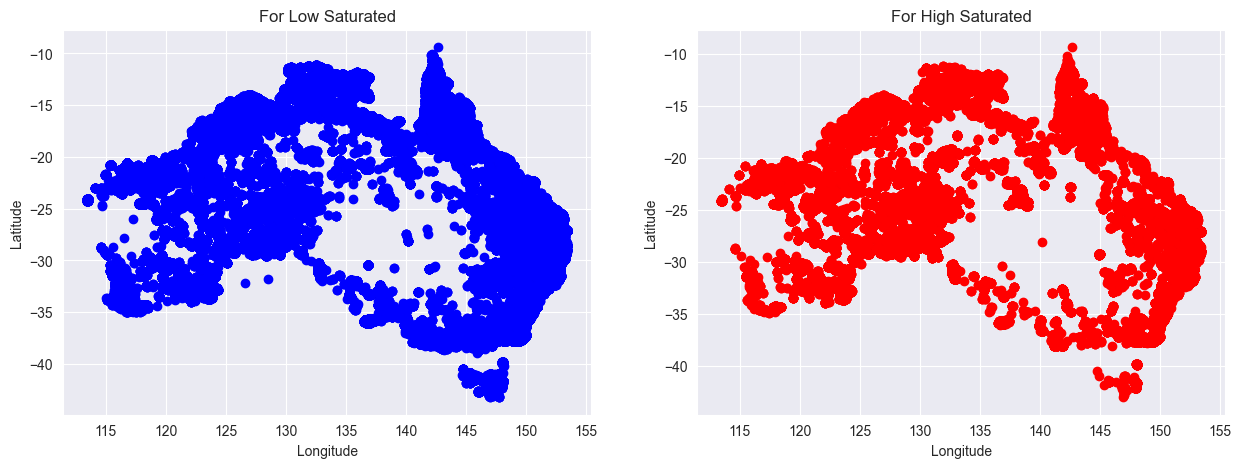

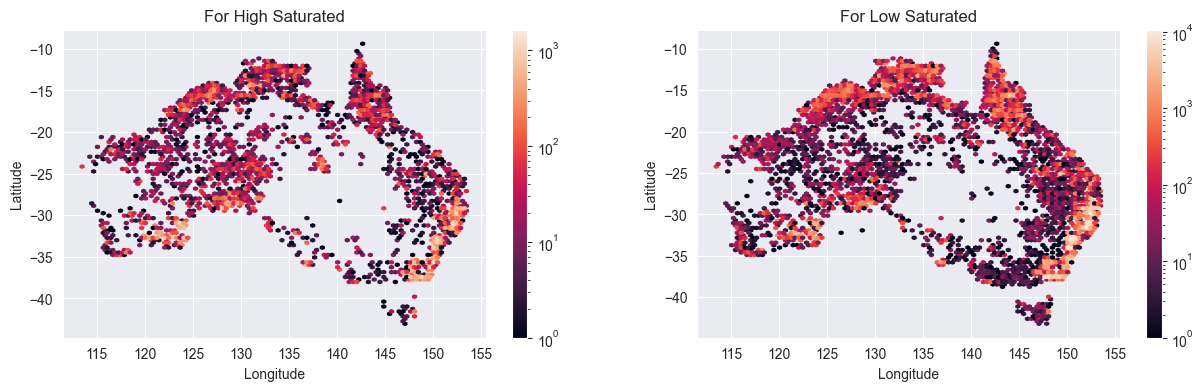

In [94]:
# --------------------------------------- SIMPLE SCATTER PLOT -------------------------------------------------

sns.set_style("darkgrid")

plt.figure(figsize=(15,5))
 # For Upper Axis (AXU)
axu0 = plt.subplot(1,2,1)
axu0.scatter(data=low_sat,x="longitude", y="latitude",color="blue")
plt.title("For Low Saturated")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

axu1 = plt.subplot(1,2,2)
axu1.scatter(data=high_sat,x="longitude", y="latitude",color="red")
plt.title("For High Saturated")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# --------------------------------------- HEXBIN PLOT ---------------------------------------------------------

plt.figure(figsize=(15,4))

# # For Lower Axis (AXL)

axl0 = plt.subplot(1,2,1)
axl0.set_title("For High Saturated")
axl0.set_xlabel("Longitude")
axl0.set_ylabel("Latitude")
plt.hexbin(long_high, lati_high,bins="log");
plt.colorbar()

axl1 = plt.subplot(1,2,2)
axl1.set_title("For Low Saturated")
axl1.set_xlabel("Longitude")
axl1.set_ylabel("Latitude")
plt.hexbin(long_low, lati_low, bins="log")
plt.colorbar();

**2.2) Plot both groups in the same axes with different colors. Try changing the order of plotting
the two classes (i.e. draw the saturated first then the non-saturated or the other way around).
Make sure to include a legend. How does that impact the result?**

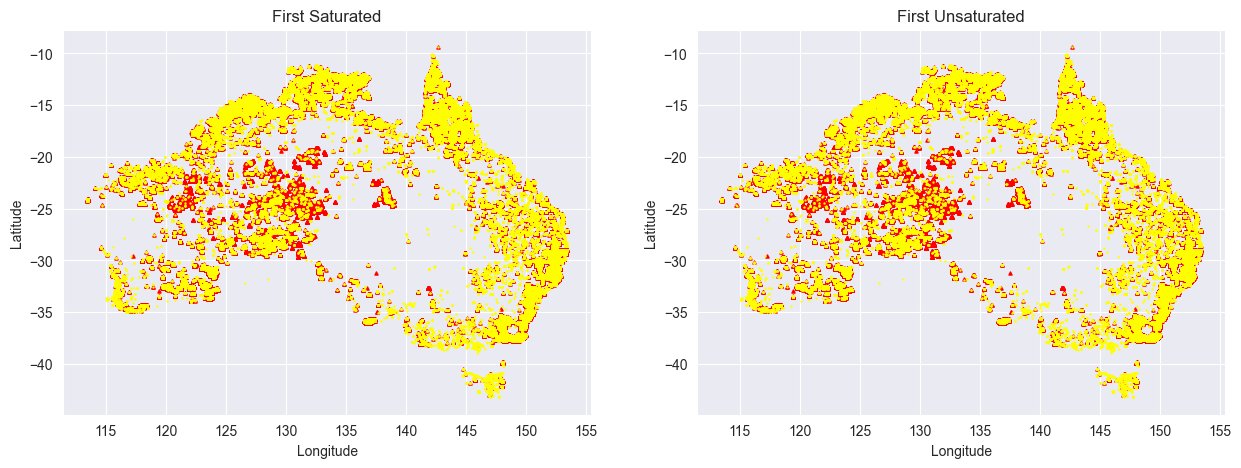

In [109]:
# ------------------------------------ FIRST SATURATED THEN UNSATURATED ------------------------------------
plt.figure(figsize=(15,5))
ax0 = plt.subplot(1,2,1)
ax0.set_title("First Saturated")
ax0.set_xlabel("Longitude")
ax0.set_ylabel("Latitude")
plt.scatter(long_high, lati_high, marker="^", color="red", s=5)
plt.scatter(long_low, lati_low, marker=".", color="yellow", s=2)

# ------------------------------------ FIRST UNSATURATED THEN SATURATED ------------------------------------
ax1 = plt.subplot(1,2,2)
ax1.set_title("First Unsaturated")
ax1.set_xlabel("Longitude")
ax1.set_ylabel("Latitude")
plt.scatter(long_high, lati_high, marker="^", color="red", s=5)
plt.scatter(long_low, lati_low, marker=".", color="yellow", s=2)

In [ ]:
sns.pairplot(data=df_data)